<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li></ul></div>

In [1]:
import os
os.chdir('../../')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from spikelearn.data import io, SHORTCUTS, select, to_feature_array, remove_baseline
from spikelearn.models.shuffle_decoding import shuffle_val_predict

from xgboost import XGBClassifier, XGBRegressor


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
plt.style.use('dark_background')
mpl.rc("figure", figsize=(10,6))
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.facecolor'] = (1,1,1,0)
mpl.rcParams['figure.facecolor'] = (1,1,1,0)
sns.set_palette('deep', color_codes=True)

In [96]:
'_2' in 'ELI 3_2'

True

In [4]:
import pickle

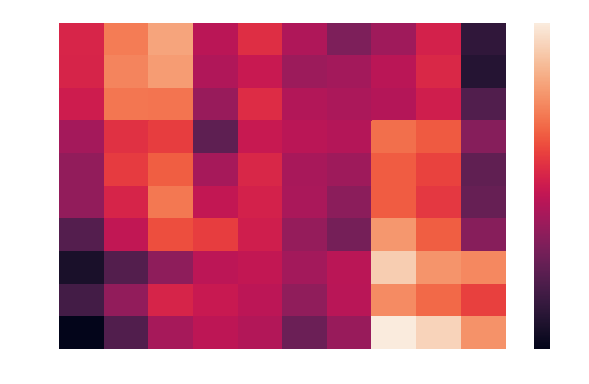

In [75]:
res.proba_matrix(grouping=('trained_here', False));.

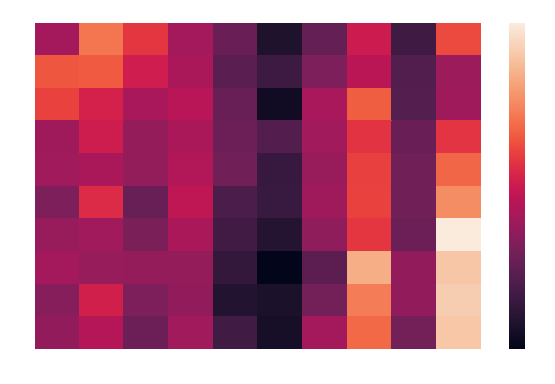

In [76]:
res.confusion_matrix(grouping=('trained_here', True));

In [48]:
res.proba_matrix(grouping=('tested_on', 'PFC'));

KeyError: 'PFC'

In [4]:
%load_ext autoreload
%autoreload 2

In [6]:
xgb = XGBClassifier()

In [5]:
data = io.load('DRRD 8', 'wide_smoothed')
data = to_feature_array(select(data, is_selected=True, is_tired=False, _min_duration=1.5))

In [6]:
clf=LogisticRegression(multi_class='ovr')#, solver='saga', max_iter=1)

In [7]:
res = shuffle_val_predict(clf, [data.iloc[:,:i] for i in range(3,7,2)], get_weights=False, n_splits=10, feature_scaling='minmax', verbose=1, cross_prediction=False, balance_feature_number=False)


-------
Dataset 0

-------
Dataset 1


In [8]:
res.save('data/results/res.pickle')

In [28]:
res.score.groupby('trained_on').mean()

,cv,tested_on,trained_here,n_features,score_max,score_mean
trained_on,,,,,,
0,4.5,0.0,True,3.0,0.119194,0.171916
1,4.5,1.0,True,5.0,0.201595,0.245094


In [68]:
xgb.fit(data, data.reset_index().time)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [69]:
from xgboost.plotting import plot_importance

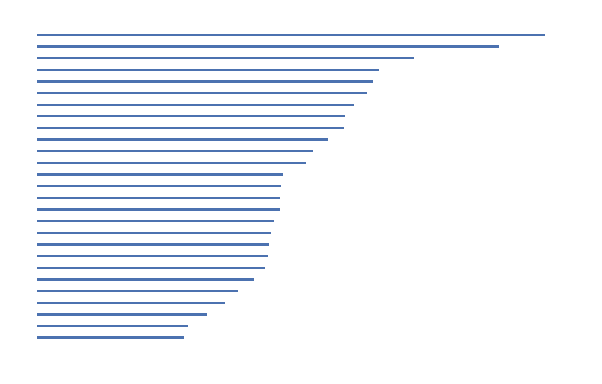

In [70]:
plot_importance(xgb)

In [71]:
data = io.load('DRRD 8', 'medium_smoothed')
data = to_feature_array(select(data, is_selected=True, is_tired=False, _min_duration=1.5))

In [72]:
m=remove_baseline(data*100, io.load('DRRD 7', 'baseline'), .5).reset_index().melt(id_vars=['trial','time'])

/home/tevo/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


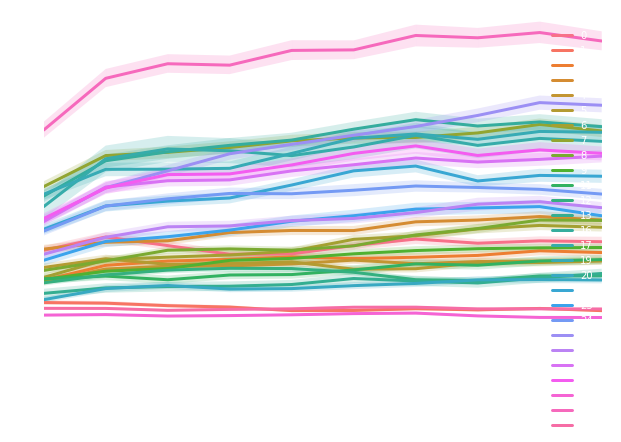

In [73]:
sns.tsplot(time='time', unit='trial', value='value', data=m, condition='unit')

In [21]:
k=data[20].reset_index()[data[20].reset_index().trial < 39]
k['unit']=20

/home/tevo/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


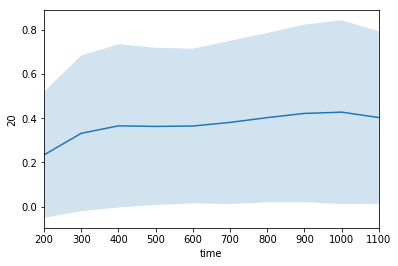

In [23]:
sns.tsplot(time='time', unit='trial', value=20, data=data[20].reset_index(), ci='sd')

/home/tevo/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


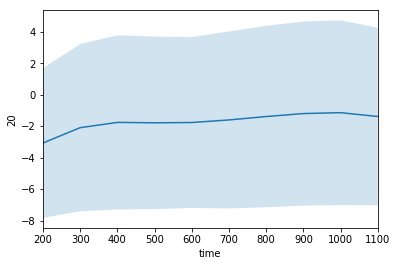

In [25]:
sns.tsplot(time='time', unit='trial', value=20, data=remove_baseline(data*10, io.load('DRRD 8', 'baseline'), .5)[20].reset_index(), ci='sd')

In [200]:
bl = (io.load('DRRD 8', 'baseline').applymap(len)/.5).stack('unit')
bl.name='baseline'

In [135]:
import pandas as pd

In [202]:
fr=data.reset_index('time').groupby('trial').mean().drop('time',axis=1).stack('unit')
fr.name='fr'
fr = pd.DataFrame(fr)
bl = pd.DataFrame(bl)

In [212]:
b0= bl.reset_index().groupby('unit').get_group(0)
f0= fr.reset_index().groupby('unit').get_group(0)

In [215]:
f0['bl'] = f0.trial.map(b0.set_index('trial').baseline)

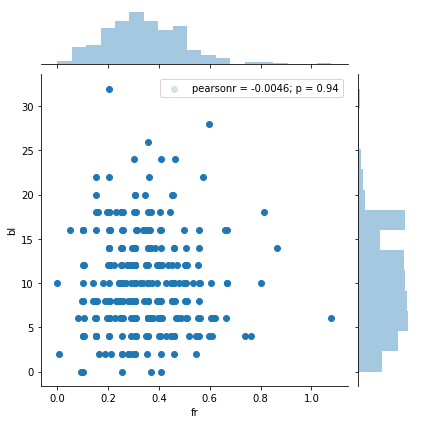

In [217]:
sns.jointplot('fr', 'bl', f0)

#####  Without baseline

In [55]:
n = remove_baseline(data, io.load('DRRD 8', 'baseline'), .5).reset_index().melt(id_vars=['trial','time'])

/home/registroeletrofisio/miniconda3/envs/ratLearn/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


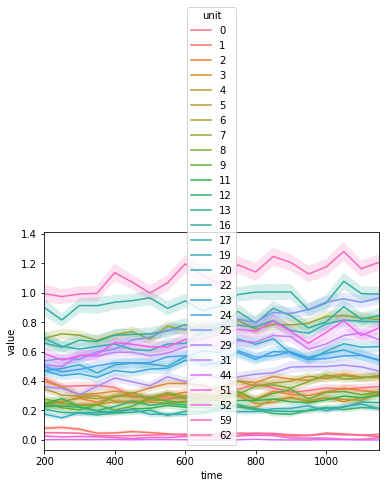

In [89]:
sns.tsplot(time='time', unit='trial', value='value', data=m, condition='unit')z

---

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [14]:
res={}

In [62]:
data = io.load(label, 'medium_smoothed_norm')
data = select(data, is_selected=True, is_tired=True, _min_duration=1.5)
sel = to_feature_array(data, subset='full')

In [166]:
from itertools import product

In [329]:
resall= pd.DataFrame()

In [373]:
res={'full':{}, 'cropped':{}}
for label, subset in product(SHORTCUTS['groups']['DRRD'],['full', 'cropped']):
    data = io.load(label, 'medium_smoothed')
    data = select(data, is_selected=True, is_tired=False, _min_duration=1.5)
    data = to_feature_array(data, subset=subset)
    res[subset][label] = shuffle_val_predict(clf, [data.iloc[:500], data.iloc[-500:]], ['init', 'end'], n_splits=30, get_weights=False)
    aux =res[subset][label].score.reset_index().groupby('trained_here').get_group(True).pivot('cv', 'tested_on', 'score_max')[['init', 'end']].melt()
    aux['label'] = label
    aux['subset']=subset
    resall = resall.append(aux)

/home/registroeletrofisio/miniconda3/envs/ratLearn/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)
/home/registroeletrofisio/miniconda3/envs/ratLearn/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)
/home/registroeletrofisio/miniconda3/envs/ratLearn/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the f

In [374]:
crop = resall.groupby('subset').get_group('cropped')
full = resall.groupby('subset').get_group('full')

In [104]:
import pandas as pd

In [108]:
pd.concat((pd.DataFrame(),res.proba_matrix(False)))#.reset_index().groupby('true_label').mean()

,200.0,300.0,400.0,500.0,600.0,700.0,800.0,900.0,1000.0,1100.0
true_label,,,,,,,,,,
200.0,0.102415,0.108185,0.107783,0.099442,0.101455,0.098309,0.094693,0.096198,0.098943,0.092578
300.0,0.105186,0.108119,0.107811,0.099960,0.101031,0.097998,0.095879,0.095414,0.098397,0.090206
400.0,0.103338,0.106354,0.104829,0.099109,0.102044,0.099231,0.096992,0.097133,0.098297,0.092673
500.0,0.098774,0.102205,0.102251,0.096941,0.100632,0.099516,0.098184,0.102409,0.101902,0.097186
600.0,0.097680,0.101556,0.103125,0.099305,0.100613,0.098518,0.097839,0.103200,0.102728,0.095436
700.0,0.097424,0.100241,0.103677,0.100743,0.101048,0.097338,0.096919,0.103624,0.102208,0.096778
800.0,0.094208,0.097489,0.100456,0.102470,0.101637,0.097721,0.096714,0.105054,0.103834,0.100418
900.0,0.090529,0.091400,0.094756,0.098897,0.099001,0.097554,0.098374,0.111471,0.108744,0.109274
1000.0,0.093023,0.095062,0.097197,0.098975,0.098486,0.096961,0.098736,0.108987,0.106278,0.106295


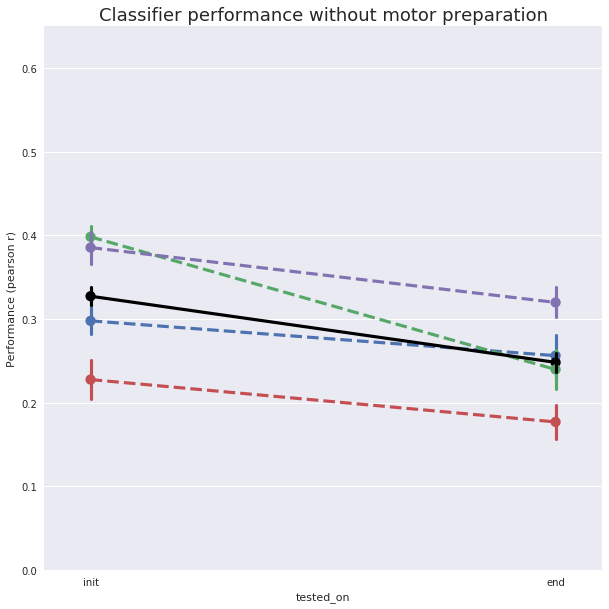

In [375]:
plt.figure(figsize=(10,10))
sns.pointplot(x='tested_on', y='value',hue='label', data=crop,hue_order=['DRRD 10','DRRD 9','DRRD 7','DRRD 8'], linestyles='--',dodge=False,legend=False)
sns.pointplot(x='tested_on', y='value',data=crop, color='k',dodge=True, n_boot=5000)
plt.gca().legend_.remove()
plt.ylim(0,.65)
plt.xlim(-.1,1.1)
plt.title('Classifier performance without motor preparation', fontsize=18)
plt.ylabel('Performance (pearson r)')
plt.savefig('sem_motor_50.png',dpi=200)

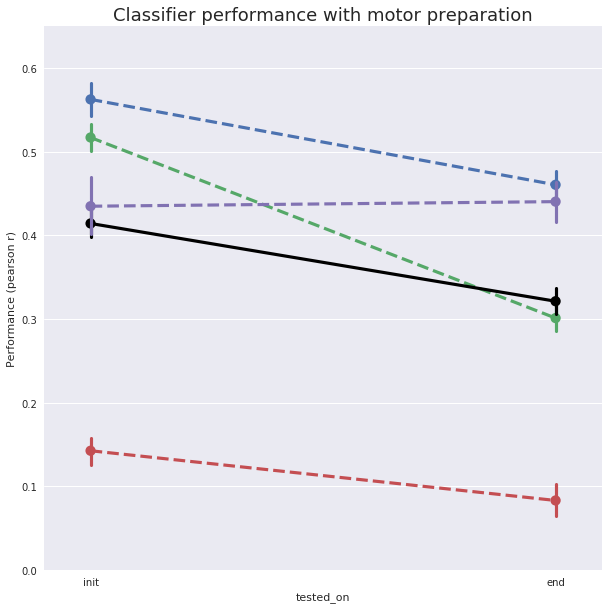

In [376]:
plt.figure(figsize=(10,10))
sns.pointplot(x='tested_on', y='value',hue='label',data=full,hue_order=['DRRD 10','DRRD 9','DRRD 7','DRRD 8'], linestyles='--',dodge=False,legend=False)
sns.pointplot(x='tested_on', y='value',data=full,color='k',dodge=True, linewidth=3)
plt.gca().legend_.remove()
plt.ylim(0,.65)
plt.xlim(-.1,1.1)
plt.title('Classifier performance with motor preparation', fontsize=18)
plt.ylabel('Performance (pearson r)')
plt.savefig('com_motor_50.png',dpi=200)

---

No handles with labels found to put in legend.


(-0.1, 1.1)

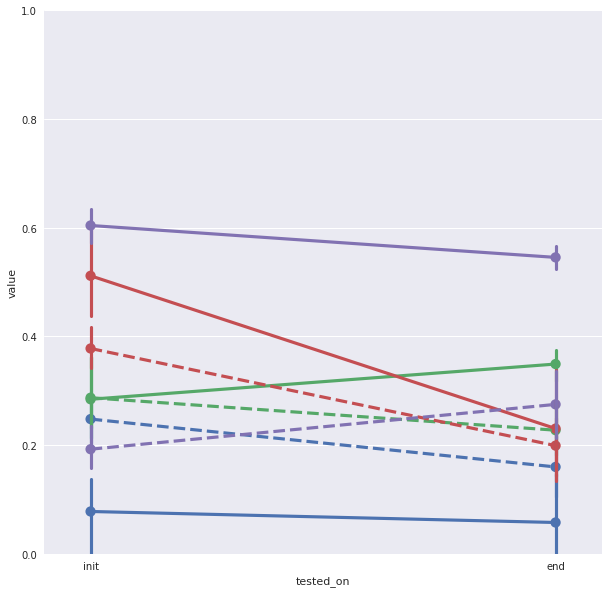

In [236]:
ls={'full':'-', 'cropped':'--'}
mk={'full':'.', 'cropped': '*'}
pal=sns.color_palette('deep',4)
c={'DRRD 7':pal[0], 'DRRD 8':pal[1],'DRRD 9':pal[2],'DRRD 10':pal[3]}

plt.figure(figsize=(10,10))
for label, subset in product(SHORTCUTS['groups']['DRRD'],['full', 'cropped']):
    if label != 'DRRD ':
        d=res[subset][label].score.reset_index().groupby('trained_here').get_group(True).pivot('cv', 'tested_on', 'score_max')[['init', 'end']]
        sns.pointplot(x='tested_on', y='value',data=d.melt(),marker=mk[subset], linestyles=ls[subset], markersize=20, label=label, color=c[label],linewidth=3)        
plt.legend()
plt.ylim(0,1)
plt.xlim(-.1,1.1)
